# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-01-27 02:40:15--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’

Miniconda3-py37_4.8 100%[===================>]  81.12M  87.9MB/s    in 0.9s    

2025-01-27 02:40:16 (87.9 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1

## **Load bioactivity data**

In [52]:
import pandas as pd

In [62]:
try:
    df = pd.read_csv('bioactivity_preprocessed_data.csv')
except Exception as e:
    print(f"An error occurred: {e}")

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [63]:
import pandas as pd

In [64]:
!pip install rdkit

In [65]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [77]:
df_original = pd.read_csv('bioactivity_preprocessed_data.csv')

In [90]:
def view_ec50(df):
    try:
        ec50_column = df['EC50 (nM)']
        return ec50_column
    except KeyError:
        return "EC50 (nM) column not found in the DataFrame."

ec50_values = view_ec50(df_original)

print(ec50_values) # Prints the 'EC50 (nM)' column or the error message if not found.

0       0.158489
1       0.180000
2           0.52
3           0.55
4            0.6
         ...    
413       >10000
414       >10000
415        10800
416        16870
417        82000
Name: EC50 (nM), Length: 418, dtype: object


In [81]:
from IPython.display import display

display(df_original)

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain,UniProt (SwissProt) Entry Name of Target Chain,UniProt (SwissProt) Primary ID of Target Chain,UniProt (SwissProt) Secondary ID(s) of Target Chain,UniProt (SwissProt) Alternative ID(s) of Target Chain,UniProt (TrEMBL) Submitted Name of Target Chain,UniProt (TrEMBL) Entry Name of Target Chain,UniProt (TrEMBL) Primary ID of Target Chain,UniProt (TrEMBL) Secondary ID(s) of Target Chain,UniProt (TrEMBL) Alternative ID(s) of Target Chain
0,50869980,O=C1CCc2ccccc2N1CCCN1CCN(CC1)c1ccccc1,InChI=1S/C22H27N3O/c26-22-12-11-19-7-4-5-10-21...,ABOBMBIQQPJTMJ-UHFFFAOYSA-N,50263488,CHEMBL4085780,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,D(4) dopamine receptor,DRD4_HUMAN,P21917,B0M0J7 Q7Z7Q5 Q8NGM5,NaN,NaN,NaN,NaN,NaN,NaN
1,51512528,CC(C)N1C[C@H](C)[C@H](C1)NC(=O)N1Cc2ccccc2[C@@...,InChI=1S/C18H27N3O/c1-12(2)20-9-13(3)17(11-20)...,IMDMWQYWHACQHO-ZQIUZPCESA-N,50608795,CHEMBL5290993,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,D(4) dopamine receptor,DRD4_HUMAN,P21917,B0M0J7 Q7Z7Q5 Q8NGM5,NaN,NaN,NaN,NaN,NaN,NaN
2,50838916,COc1ccccc1N1CCN(Cc2cn3cc(I)ccc3n2)CC1,InChI=1S/C19H21IN4O/c1-25-18-5-3-2-4-17(18)23-...,LAVWIAQCYKFCMG-UHFFFAOYSA-N,50189841,6-iodo-2-[4-(2-methoxyphenyl)piperazin-1-ylmet...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,D(4) dopamine receptor,DRD4_HUMAN,P21917,B0M0J7 Q7Z7Q5 Q8NGM5,NaN,NaN,NaN,NaN,NaN,NaN
3,50828692,[Fe]123456789C%10C1=C2C3=C4%10.N(CCCCN1CCN(CC1...,InChI=1S/C21H24N3O2.C5H.Fe/c1-26-20-11-5-4-10-...,ZBWVSTNZRBXPIP-UHFFFAOYSA-N,50167931,CHEMBL364516::N-{4-[4-(2-methoxyphenyl)piperaz...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,D(4) dopamine receptor,DRD4_HUMAN,P21917,B0M0J7 Q7Z7Q5 Q8NGM5,NaN,NaN,NaN,NaN,NaN,NaN
4,50342492,COc1ccccc1N1CCN(Cc2cnn(c2)-c2ccccc2)CC1,InChI=1S/C21H24N4O/c1-26-21-10-6-5-9-20(21)24-...,VFDZFYCKUWKAKM-UHFFFAOYSA-N,50184795,1-(2-methoxyphenyl)-4-((1-phenyl-1H-pyrazol-4-...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,D(4) dopamine receptor,DRD4_HUMAN,P21917,B0M0J7 Q7Z7Q5 Q8NGM5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,50357046,Fc1ccc(cc1)C(CN1CCN(CC1)c1ccccn1)N=O,InChI=1S/C17H19FN4O/c18-15-6-4-14(5-7-15)16(20...,NYHRBBQCHIDELW-UHFFFAOYSA-N,50193300,(E)-1-(4-fluorophenyl)-2-(4-pyridin-2-yl)ethan...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,D(4) dopamine receptor,DRD4_HUMAN,P21917,B0M0J7 Q7Z7Q5 Q8NGM5,NaN,NaN,NaN,NaN,NaN,NaN
414,50357074,Cc1ccc(OCc2ccccc2)c(c1)C(CCN1CCN(CC1)c1ccccn1)N=O,InChI=1S/C26H30N4O2/c1-21-10-11-25(32-20-22-7-...,KDJPVFHPPPNEAW-UHFFFAOYSA-N,50193390,(E)-1-(2-benzyloxy-5-methylphenyl)-3-(4-pyridi...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,D(4) dopamine receptor,DRD4_HUMAN,P21917,B0M0J7 Q7Z7Q5 Q8NGM5,NaN,NaN,NaN,NaN,NaN,NaN
415,51512533,CCOC(=O)c1nn(cc1CN(C)[C@@H]1CCSC1)-c1ccccc1,InChI=1S/C18H23N3O2S/c1-3-23-18(22)17-14(11-20...,CDDSADAPSRSSJF-MRXNPFEDSA-N,50608800,CHEMBL5283608,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,D(4) dopamine receptor,DRD4_HUMAN,P21917,B0M0J7 Q7Z7Q5 Q8NGM5,NaN,NaN,NaN,NaN,NaN,NaN
416,51512535,CC(=O)OC1CC(C)(C)C(\C=C\C(C)=CC=CC(C)=CC=CC=C(...,InChI=1S/C42H60O6/c1-29(18-14-19-31(3)22-23-37...,ZVUYBPNXDUTAIH-LRTQWWJOSA-N,50608804,CHEMBL1575074,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,D(4) dopamine receptor,DRD4_HUMAN,P21917,B0M0J7 Q7Z7Q5 Q8NGM5,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [83]:
df_lipinski = lipinski(df['Ligand SMILES'])

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [84]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,349.478,3.17810,0.0,3.0
1,301.434,3.00150,1.0,2.0
2,448.308,3.26970,0.0,5.0
3,467.350,3.01130,1.0,4.0
4,348.450,3.20310,0.0,5.0
...,...,...,...,...
413,314.364,2.85040,0.0,5.0
414,430.552,4.98882,0.0,6.0
415,345.468,2.98630,0.0,6.0
416,660.936,8.78310,2.0,6.0


In [85]:
df

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain,UniProt (SwissProt) Entry Name of Target Chain,UniProt (SwissProt) Primary ID of Target Chain,UniProt (SwissProt) Secondary ID(s) of Target Chain,UniProt (SwissProt) Alternative ID(s) of Target Chain,UniProt (TrEMBL) Submitted Name of Target Chain,UniProt (TrEMBL) Entry Name of Target Chain,UniProt (TrEMBL) Primary ID of Target Chain,UniProt (TrEMBL) Secondary ID(s) of Target Chain,UniProt (TrEMBL) Alternative ID(s) of Target Chain
0,50869980,O=C1CCc2ccccc2N1CCCN1CCN(CC1)c1ccccc1,InChI=1S/C22H27N3O/c26-22-12-11-19-7-4-5-10-21...,ABOBMBIQQPJTMJ-UHFFFAOYSA-N,50263488,CHEMBL4085780,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,D(4) dopamine receptor,DRD4_HUMAN,P21917,B0M0J7 Q7Z7Q5 Q8NGM5,NaN,NaN,NaN,NaN,NaN,NaN
1,51512528,CC(C)N1C[C@H](C)[C@H](C1)NC(=O)N1Cc2ccccc2[C@@...,InChI=1S/C18H27N3O/c1-12(2)20-9-13(3)17(11-20)...,IMDMWQYWHACQHO-ZQIUZPCESA-N,50608795,CHEMBL5290993,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,D(4) dopamine receptor,DRD4_HUMAN,P21917,B0M0J7 Q7Z7Q5 Q8NGM5,NaN,NaN,NaN,NaN,NaN,NaN
2,50838916,COc1ccccc1N1CCN(Cc2cn3cc(I)ccc3n2)CC1,InChI=1S/C19H21IN4O/c1-25-18-5-3-2-4-17(18)23-...,LAVWIAQCYKFCMG-UHFFFAOYSA-N,50189841,6-iodo-2-[4-(2-methoxyphenyl)piperazin-1-ylmet...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,D(4) dopamine receptor,DRD4_HUMAN,P21917,B0M0J7 Q7Z7Q5 Q8NGM5,NaN,NaN,NaN,NaN,NaN,NaN
3,50828692,[Fe]123456789C%10C1=C2C3=C4%10.N(CCCCN1CCN(CC1...,InChI=1S/C21H24N3O2.C5H.Fe/c1-26-20-11-5-4-10-...,ZBWVSTNZRBXPIP-UHFFFAOYSA-N,50167931,CHEMBL364516::N-{4-[4-(2-methoxyphenyl)piperaz...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,D(4) dopamine receptor,DRD4_HUMAN,P21917,B0M0J7 Q7Z7Q5 Q8NGM5,NaN,NaN,NaN,NaN,NaN,NaN
4,50342492,COc1ccccc1N1CCN(Cc2cnn(c2)-c2ccccc2)CC1,InChI=1S/C21H24N4O/c1-26-21-10-6-5-9-20(21)24-...,VFDZFYCKUWKAKM-UHFFFAOYSA-N,50184795,1-(2-methoxyphenyl)-4-((1-phenyl-1H-pyrazol-4-...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,D(4) dopamine receptor,DRD4_HUMAN,P21917,B0M0J7 Q7Z7Q5 Q8NGM5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,50357046,Fc1ccc(cc1)C(CN1CCN(CC1)c1ccccn1)N=O,InChI=1S/C17H19FN4O/c18-15-6-4-14(5-7-15)16(20...,NYHRBBQCHIDELW-UHFFFAOYSA-N,50193300,(E)-1-(4-fluorophenyl)-2-(4-pyridin-2-yl)ethan...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,D(4) dopamine receptor,DRD4_HUMAN,P21917,B0M0J7 Q7Z7Q5 Q8NGM5,NaN,NaN,NaN,NaN,NaN,NaN
414,50357074,Cc1ccc(OCc2ccccc2)c(c1)C(CCN1CCN(CC1)c1ccccn1)N=O,InChI=1S/C26H30N4O2/c1-21-10-11-25(32-20-22-7-...,KDJPVFHPPPNEAW-UHFFFAOYSA-N,50193390,(E)-1-(2-benzyloxy-5-methylphenyl)-3-(4-pyridi...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,D(4) dopamine receptor,DRD4_HUMAN,P21917,B0M0J7 Q7Z7Q5 Q8NGM5,NaN,NaN,NaN,NaN,NaN,NaN
415,51512533,CCOC(=O)c1nn(cc1CN(C)[C@@H]1CCSC1)-c1ccccc1,InChI=1S/C18H23N3O2S/c1-3-23-18(22)17-14(11-20...,CDDSADAPSRSSJF-MRXNPFEDSA-N,50608800,CHEMBL5283608,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,D(4) dopamine receptor,DRD4_HUMAN,P21917,B0M0J7 Q7Z7Q5 Q8NGM5,NaN,NaN,NaN,NaN,NaN,NaN
416,51512535,CC(=O)OC1CC(C)(C)C(\C=C\C(C)=CC=CC(C)=CC=CC=C(...,InChI=1S/C42H60O6/c1-29(18-14-19-31(3)22-23-37...,ZVUYBPNXDUTAIH-LRTQWWJOSA-N,50608804,CHEMBL1575074,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,D(4) dopamine receptor,DRD4_HUMAN,P21917,B0M0J7 Q7Z7Q5 Q8NGM5,NaN,NaN,NaN,NaN,NaN,NaN


Now, let's combine the 2 DataFrame

In [86]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [87]:
df_combined

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Alternative ID(s) of Target Chain,UniProt (TrEMBL) Submitted Name of Target Chain,UniProt (TrEMBL) Entry Name of Target Chain,UniProt (TrEMBL) Primary ID of Target Chain,UniProt (TrEMBL) Secondary ID(s) of Target Chain,UniProt (TrEMBL) Alternative ID(s) of Target Chain,MW,LogP,NumHDonors,NumHAcceptors
0,50869980,O=C1CCc2ccccc2N1CCCN1CCN(CC1)c1ccccc1,InChI=1S/C22H27N3O/c26-22-12-11-19-7-4-5-10-21...,ABOBMBIQQPJTMJ-UHFFFAOYSA-N,50263488,CHEMBL4085780,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,349.478,3.17810,0.0,3.0
1,51512528,CC(C)N1C[C@H](C)[C@H](C1)NC(=O)N1Cc2ccccc2[C@@...,InChI=1S/C18H27N3O/c1-12(2)20-9-13(3)17(11-20)...,IMDMWQYWHACQHO-ZQIUZPCESA-N,50608795,CHEMBL5290993,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,301.434,3.00150,1.0,2.0
2,50838916,COc1ccccc1N1CCN(Cc2cn3cc(I)ccc3n2)CC1,InChI=1S/C19H21IN4O/c1-25-18-5-3-2-4-17(18)23-...,LAVWIAQCYKFCMG-UHFFFAOYSA-N,50189841,6-iodo-2-[4-(2-methoxyphenyl)piperazin-1-ylmet...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,448.308,3.26970,0.0,5.0
3,50828692,[Fe]123456789C%10C1=C2C3=C4%10.N(CCCCN1CCN(CC1...,InChI=1S/C21H24N3O2.C5H.Fe/c1-26-20-11-5-4-10-...,ZBWVSTNZRBXPIP-UHFFFAOYSA-N,50167931,CHEMBL364516::N-{4-[4-(2-methoxyphenyl)piperaz...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,467.350,3.01130,1.0,4.0
4,50342492,COc1ccccc1N1CCN(Cc2cnn(c2)-c2ccccc2)CC1,InChI=1S/C21H24N4O/c1-26-21-10-6-5-9-20(21)24-...,VFDZFYCKUWKAKM-UHFFFAOYSA-N,50184795,1-(2-methoxyphenyl)-4-((1-phenyl-1H-pyrazol-4-...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,348.450,3.20310,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,50357046,Fc1ccc(cc1)C(CN1CCN(CC1)c1ccccn1)N=O,InChI=1S/C17H19FN4O/c18-15-6-4-14(5-7-15)16(20...,NYHRBBQCHIDELW-UHFFFAOYSA-N,50193300,(E)-1-(4-fluorophenyl)-2-(4-pyridin-2-yl)ethan...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,314.364,2.85040,0.0,5.0
414,50357074,Cc1ccc(OCc2ccccc2)c(c1)C(CCN1CCN(CC1)c1ccccn1)N=O,InChI=1S/C26H30N4O2/c1-21-10-11-25(32-20-22-7-...,KDJPVFHPPPNEAW-UHFFFAOYSA-N,50193390,(E)-1-(2-benzyloxy-5-methylphenyl)-3-(4-pyridi...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,430.552,4.98882,0.0,6.0
415,51512533,CCOC(=O)c1nn(cc1CN(C)[C@@H]1CCSC1)-c1ccccc1,InChI=1S/C18H23N3O2S/c1-3-23-18(22)17-14(11-20...,CDDSADAPSRSSJF-MRXNPFEDSA-N,50608800,CHEMBL5283608,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,345.468,2.98630,0.0,6.0
416,51512535,CC(=O)OC1CC(C)(C)C(\C=C\C(C)=CC=CC(C)=CC=CC=C(...,InChI=1S/C42H60O6/c1-29(18-14-19-31(3)22-23-37...,ZVUYBPNXDUTAIH-LRTQWWJOSA-N,50608804,CHEMBL1575074,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,660.936,8.78310,2.0,6.0


In [105]:
df_cleaned = df_combined[df_combined['MW'] < 500]  # Example: keep molecules with MW < 500

### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [107]:
def pEC50(input, ec50_column='EC50 (nM)'):  # Add ec50_column as an argument
    pEC50 = []
    for i in input[ec50_column]:  # Use ec50_column to access the correct column
        try:
            i = float(i)  # Attempt to convert to float
            if i > 0:  # Check if value is positive
                molar = i * (10 ** -9)
                pEC50.append(-np.log10(molar))
            else:
                pEC50.append(np.nan)  # Or handle it differently
        except ValueError:
            pEC50.append(np.nan)  # Handle cases where conversion to float fails
    input['pEC50'] = pEC50
    x = input.drop(ec50_column, axis=1)  # Use ec50_column to drop the correct column
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

df_combined = pEC50(df_combined)

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [109]:
from IPython.display import display

display(df_combined)

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (TrEMBL) Submitted Name of Target Chain,UniProt (TrEMBL) Entry Name of Target Chain,UniProt (TrEMBL) Primary ID of Target Chain,UniProt (TrEMBL) Secondary ID(s) of Target Chain,UniProt (TrEMBL) Alternative ID(s) of Target Chain,MW,LogP,NumHDonors,NumHAcceptors,pEC50
0,50869980,O=C1CCc2ccccc2N1CCCN1CCN(CC1)c1ccccc1,InChI=1S/C22H27N3O/c26-22-12-11-19-7-4-5-10-21...,ABOBMBIQQPJTMJ-UHFFFAOYSA-N,50263488,CHEMBL4085780,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,349.478,3.17810,0.0,3.0,9.800001
1,51512528,CC(C)N1C[C@H](C)[C@H](C1)NC(=O)N1Cc2ccccc2[C@@...,InChI=1S/C18H27N3O/c1-12(2)20-9-13(3)17(11-20)...,IMDMWQYWHACQHO-ZQIUZPCESA-N,50608795,CHEMBL5290993,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,301.434,3.00150,1.0,2.0,9.744727
2,50838916,COc1ccccc1N1CCN(Cc2cn3cc(I)ccc3n2)CC1,InChI=1S/C19H21IN4O/c1-25-18-5-3-2-4-17(18)23-...,LAVWIAQCYKFCMG-UHFFFAOYSA-N,50189841,6-iodo-2-[4-(2-methoxyphenyl)piperazin-1-ylmet...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,448.308,3.26970,0.0,5.0,9.283997
3,50828692,[Fe]123456789C%10C1=C2C3=C4%10.N(CCCCN1CCN(CC1...,InChI=1S/C21H24N3O2.C5H.Fe/c1-26-20-11-5-4-10-...,ZBWVSTNZRBXPIP-UHFFFAOYSA-N,50167931,CHEMBL364516::N-{4-[4-(2-methoxyphenyl)piperaz...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,467.350,3.01130,1.0,4.0,9.259637
4,50342492,COc1ccccc1N1CCN(Cc2cnn(c2)-c2ccccc2)CC1,InChI=1S/C21H24N4O/c1-26-21-10-6-5-9-20(21)24-...,VFDZFYCKUWKAKM-UHFFFAOYSA-N,50184795,1-(2-methoxyphenyl)-4-((1-phenyl-1H-pyrazol-4-...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,348.450,3.20310,0.0,5.0,9.221849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,50357046,Fc1ccc(cc1)C(CN1CCN(CC1)c1ccccn1)N=O,InChI=1S/C17H19FN4O/c18-15-6-4-14(5-7-15)16(20...,NYHRBBQCHIDELW-UHFFFAOYSA-N,50193300,(E)-1-(4-fluorophenyl)-2-(4-pyridin-2-yl)ethan...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,314.364,2.85040,0.0,5.0,NaN
414,50357074,Cc1ccc(OCc2ccccc2)c(c1)C(CCN1CCN(CC1)c1ccccn1)N=O,InChI=1S/C26H30N4O2/c1-21-10-11-25(32-20-22-7-...,KDJPVFHPPPNEAW-UHFFFAOYSA-N,50193390,(E)-1-(2-benzyloxy-5-methylphenyl)-3-(4-pyridi...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,430.552,4.98882,0.0,6.0,NaN
415,51512533,CCOC(=O)c1nn(cc1CN(C)[C@@H]1CCSC1)-c1ccccc1,InChI=1S/C18H23N3O2S/c1-3-23-18(22)17-14(11-20...,CDDSADAPSRSSJF-MRXNPFEDSA-N,50608800,CHEMBL5283608,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,345.468,2.98630,0.0,6.0,4.966576
416,51512535,CC(=O)OC1CC(C)(C)C(\C=C\C(C)=CC=CC(C)=CC=CC=C(...,InChI=1S/C42H60O6/c1-29(18-14-19-31(3)22-23-37...,ZVUYBPNXDUTAIH-LRTQWWJOSA-N,50608804,CHEMBL1575074,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,660.936,8.78310,2.0,6.0,4.772885


In [110]:
df_2class = df_combined[~df_combined['pEC50'].isna()]
df_2class

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (TrEMBL) Submitted Name of Target Chain,UniProt (TrEMBL) Entry Name of Target Chain,UniProt (TrEMBL) Primary ID of Target Chain,UniProt (TrEMBL) Secondary ID(s) of Target Chain,UniProt (TrEMBL) Alternative ID(s) of Target Chain,MW,LogP,NumHDonors,NumHAcceptors,pEC50
0,50869980,O=C1CCc2ccccc2N1CCCN1CCN(CC1)c1ccccc1,InChI=1S/C22H27N3O/c26-22-12-11-19-7-4-5-10-21...,ABOBMBIQQPJTMJ-UHFFFAOYSA-N,50263488,CHEMBL4085780,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,349.478,3.17810,0.0,3.0,9.800001
1,51512528,CC(C)N1C[C@H](C)[C@H](C1)NC(=O)N1Cc2ccccc2[C@@...,InChI=1S/C18H27N3O/c1-12(2)20-9-13(3)17(11-20)...,IMDMWQYWHACQHO-ZQIUZPCESA-N,50608795,CHEMBL5290993,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,301.434,3.00150,1.0,2.0,9.744727
2,50838916,COc1ccccc1N1CCN(Cc2cn3cc(I)ccc3n2)CC1,InChI=1S/C19H21IN4O/c1-25-18-5-3-2-4-17(18)23-...,LAVWIAQCYKFCMG-UHFFFAOYSA-N,50189841,6-iodo-2-[4-(2-methoxyphenyl)piperazin-1-ylmet...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,448.308,3.26970,0.0,5.0,9.283997
3,50828692,[Fe]123456789C%10C1=C2C3=C4%10.N(CCCCN1CCN(CC1...,InChI=1S/C21H24N3O2.C5H.Fe/c1-26-20-11-5-4-10-...,ZBWVSTNZRBXPIP-UHFFFAOYSA-N,50167931,CHEMBL364516::N-{4-[4-(2-methoxyphenyl)piperaz...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,467.350,3.01130,1.0,4.0,9.259637
4,50342492,COc1ccccc1N1CCN(Cc2cnn(c2)-c2ccccc2)CC1,InChI=1S/C21H24N4O/c1-26-21-10-6-5-9-20(21)24-...,VFDZFYCKUWKAKM-UHFFFAOYSA-N,50184795,1-(2-methoxyphenyl)-4-((1-phenyl-1H-pyrazol-4-...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,348.450,3.20310,0.0,5.0,9.221849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,51283796,Cc1cccc(NC(=O)CN2CCN(CC2)c2cccc3ccccc23)c1,InChI=1S/C23H25N3O/c1-18-6-4-9-20(16-18)24-23(...,LEQVQRFGBPYNQZ-UHFFFAOYSA-N,50523474,CHEMBL4473652,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,359.473,3.90892,1.0,3.0,5.035646
402,50821085,Clc1ccccc1N1CCN(Cc2nc3ncccc3[nH]2)CC1,InChI=1S/C17H18ClN5/c18-13-4-1-2-6-15(13)23-10...,SVZAUKNERKCTTC-UHFFFAOYSA-N,50145074,2-[4-(2-Chloro-phenyl)-piperazin-1-ylmethyl]-3...,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,327.819,2.93350,1.0,4.0,5.000000
415,51512533,CCOC(=O)c1nn(cc1CN(C)[C@@H]1CCSC1)-c1ccccc1,InChI=1S/C18H23N3O2S/c1-3-23-18(22)17-14(11-20...,CDDSADAPSRSSJF-MRXNPFEDSA-N,50608800,CHEMBL5283608,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,345.468,2.98630,0.0,6.0,4.966576
416,51512535,CC(=O)OC1CC(C)(C)C(\C=C\C(C)=CC=CC(C)=CC=CC=C(...,InChI=1S/C42H60O6/c1-29(18-14-19-31(3)22-23-37...,ZVUYBPNXDUTAIH-LRTQWWJOSA-N,50608804,CHEMBL1575074,D(4) dopamine receptor,Homo sapiens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,660.936,8.78310,2.0,6.0,4.772885


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [28]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pEC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

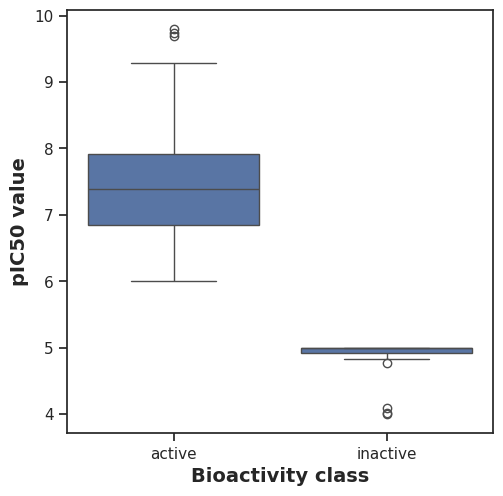

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pEC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pEC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pEC50,NaN,NaN,0.05,Different distribution (reject H0)


#### **MW**

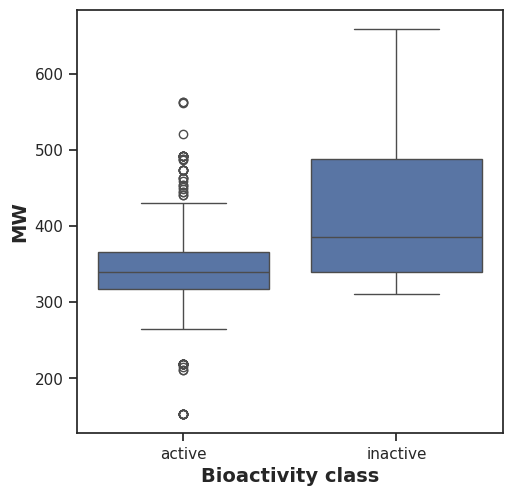

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,2120.5,0.000137,0.05,Different distribution (reject H0)


#### **LogP**

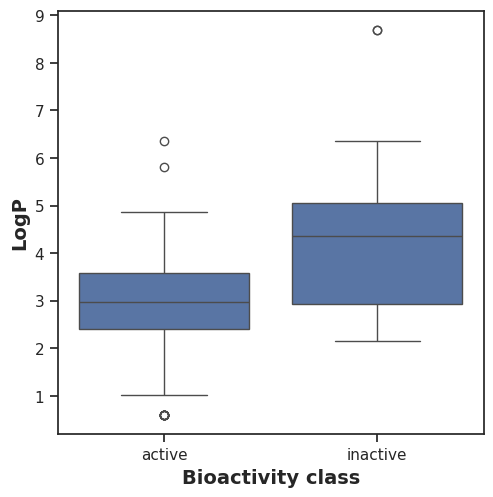

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2007.0,0.000053,0.05,Different distribution (reject H0)


#### **NumHDonors**

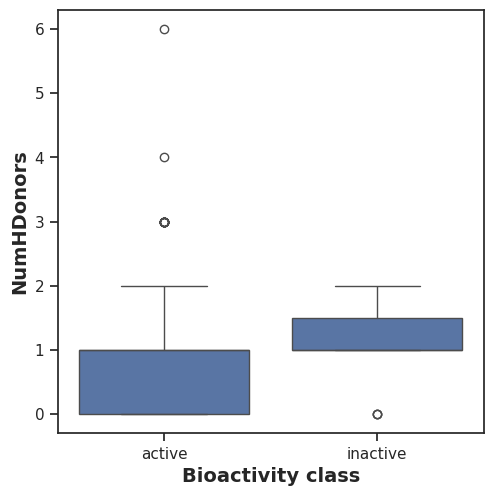

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3476.0,0.215835,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

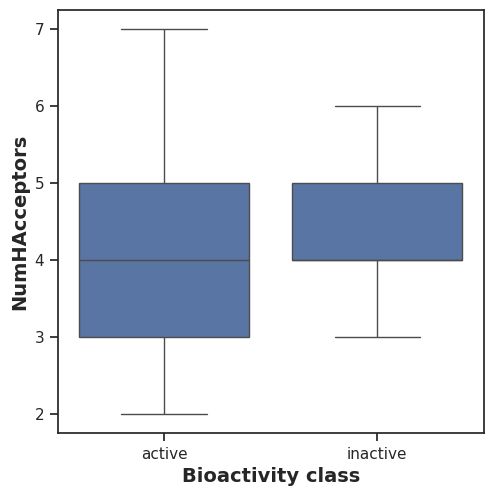

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,3681.5,0.465546,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: bioactivity_preprocessed_data.csv (deflated 82%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_MW.pdf (deflated 37%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: mannwhitneyu_pEC50.csv (deflated 9%)
  adding: plot_MW_vs_LogP.pdf (deflated 7%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: bioactivity_cleaned_data.csv (deflated 82%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: plot_LogP.pdf (deflated 37%)


In [112]:
df_2class.to_csv('df_2class.csv', index=False)
# index=False prevents the DataFrame index from being written to the file

from IPython.display import FileLink
FileLink('df_2class.csv')

/content/df_2class.csv